# **Exploratory Data Analysis (EDA) untuk Memahami Dinamika Pengangguran di Jawa Barat**

#**Kelompok 7**
1. Muhammad Daffa  Ma'arif (2305771)
2. Klara Ollivviera Augustine Gunawan (2306205)
3. Nashwa Nadria Futi (2308130)
4. Narendra Ridha Baihaqi (2308882)
5. Hafidz Tantowi (2308817)

# Pendahuluan



Pengangguran merupakan salah satu isu sosial dan ekonomi yang krusial di Indonesia, terutama di provinsi-provinsi dengan tingkat populasi tinggi seperti Jawa Barat. Sebagai provinsi dengan jumlah penduduk terbesar di Indonesia, Jawa Barat menghadapi tantangan yang kompleks dalam hal penyediaan lapangan kerja yang cukup untuk menampung angkatan kerja yang terus berkembang. Tingkat pengangguran yang tinggi dapat menjadi indikator adanya masalah struktural dalam perekonomian, ketidakcocokan antara keterampilan tenaga kerja dengan kebutuhan pasar, atau terbatasnya akses ke peluang kerja yang layak.

Dalam rangka memahami lebih dalam mengenai kondisi pengangguran di Jawa Barat, Exploratory Data Analysis (EDA) menjadi pendekatan yang penting. EDA merupakan langkah awal dalam analisis data yang bertujuan untuk mengeksplorasi dan memahami pola, tren, serta karakteristik data sebelum melakukan analisis yang lebih mendalam atau pengambilan keputusan. Melalui EDA, kita dapat menggali informasi penting dari data pengangguran di Jawa Barat, seperti distribusi tingkat pengangguran per kabupaten/kota, tren perubahan tingkat pengangguran dari waktu ke waktu, hingga hubungan antara pengangguran dengan variabel-variabel lain seperti tingkat pendidikan, usia, atau sektor industri.

Dengan menggunakan teknik visualisasi data, pengukuran statistik deskriptif, dan analisis korelasi, EDA membantu kita mengidentifikasi insight yang dapat digunakan sebagai dasar untuk merumuskan kebijakan atau intervensi yang lebih tepat sasaran dalam mengurangi pengangguran di Jawa Barat. Analisis ini juga akan memberikan gambaran awal mengenai kondisi sosial-ekonomi di provinsi ini, yang dapat menjadi landasan untuk penelitian lebih lanjut atau pembuatan model prediktif di masa mendatang.

# Pertanyaan



1. bagaimana keterkaitan antara tingkat pendidikan dengan tingkat pengangguran?
2. Lulusan pendidikan mana yang memiliki tingkat pengangguran tertinggi?
3. Bagaimana perbedaan antara jenis kelamin dengan tingkat pengangguran?
4. Bagaimana tren tingkat pengangguran pada tahun 2014 - 2023, apakah ada variabel kuat yang mempengaruhinya?
5. Bagaimana distribusi pengangguran berdasarkan golongan umur, apakah merata atau menitik berat di suatu golongan?
6. Wilayah mana yang mengalami peningkatan pengangguran paling signifikan akibat COVID-19?
7. Apakah terdapat keterkaitan antara pengangguran dan kemiskinan di suatu wilayah?
8. Apakah terdapat perbedaan tingkat pengangguran antara daerah yang kecil dan kurang padat dibandingkan dengan daerah yang padat penduduk?
9. Apakah ada jenis kelamin yang lebih terpengaruh oleh pandemi COVID-19 dalam hal pengangguran?
10. Sektor pekerjaan apa yang paling banyak dan paling sedikit menyerap lapangan kerja?
11. Bagaimana korelasi antara jumlah pengangguran, penduduk miskin, dan penduduk bekerja?

# **Praproses**

In [225]:
import pandas as pd
import seaborn as sb
import numpy as np
import warnings as warn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

warn.simplefilter(action='ignore', category=FutureWarning)

## **Load dataset**

In [226]:
tpt = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/bps-od_17044_tingkat_pengangguran_terbuka__kabupatenkota_v3_data.csv')
jptp = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_19869_jml_pengangguran_terbuka__pendidikan_kabupatenkota_v1_data.csv')
ppm = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/bps-od_17058_persentase_penduduk_miskin__kabupatenkota_v2_data.csv')
jpp = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disdukcapil_2-od_15131_jumlah_penduduk_berdasarkan_jenis_pekerjaan_v3_data.csv')
jptu = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_15805_jml_pengangguran_terbuka__golongan_umur_v1.csv')
jpt = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_15806_jml_pengangguran_terbuka__jk_v1_data.csv')
jpbjk = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_15790_jml_penduduk_bekerja__jk_v1_data.csv')
jpbk = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disnakertrans-od_15793_jml_penduduk_bekerja__kabupatenkota_v1_data.csv')
jpup = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disdukcapil_2-od_17001_jml_penduduk_usia_produktif_15__64_thn__jk_v1_data.csv')
jpjk = pd.read_csv('https://raw.githubusercontent.com/Schnee111/Datasets/refs/heads/main/disdukcapil_2-od_17892_jml_penduduk__jk_kabupatenkota_data.csv')


**Membuat array untuk dataset**

untuk memudahkan praproses, karena dataset yang dipakai cukup banyak sehingga tidak memungkinkan untuk memproses tiap dataset secara keseluruhan (proses yang terlalu panjang)



In [227]:
datasets = {'TPT': tpt,'JPTP': jptp,'PPM': ppm,'JPP': jpp,'JPTU': jptu,'JPT': jpt, 'JPBJK' : jpbjk, 'JPBK' : jpbk, 'JPUP' : jpup, 'JPJK' : jpjk}

for name, data in datasets.items():
    print(f"=== {name} ===")
    data.info()
    print("\n")

=== TPT ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            397 non-null    int64  
 1   kode_provinsi                 397 non-null    int64  
 2   nama_provinsi                 397 non-null    object 
 3   kode_kabupaten_kota           397 non-null    int64  
 4   nama_kabupaten_kota           397 non-null    object 
 5   tingkat_pengangguran_terbuka  397 non-null    float64
 6   satuan                        397 non-null    object 
 7   tahun                         397 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 24.9+ KB


=== JPTP ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id   

**Menyesuaikan nama kolom**



mengubah kolom 'tingkat_penganggur_terbuka' menjadi 'persentase_penganggur_terbuka' agar lebih mudah dipahami


In [228]:
# mengganti nama kolom tingkat_penganggur_terbuka pada dataset tpt menjadi persentase_penganggur_terbuka
datasets['TPT'].rename(columns = {'tingkat_pengangguran_terbuka':'persentase_penganggur_terbuka'}, inplace = True)
datasets['JPP'].rename(columns = {'jumlah_penduduk':'jumlah_penduduk_bekerja'}, inplace = True)
datasets['JPBJK'].rename(columns = {'jumlah_penduduk':'jumlah_penduduk_bekerja'}, inplace = True)
datasets['JPBK'].rename(columns = {'jumlah_penduduk':'jumlah_penduduk_bekerja'}, inplace = True)
datasets['JPUP'].rename(columns = {'jumlah_penduduk':'jumlah_penduduk_usia_produktif'}, inplace = True)

**Membuang Kolom yang dianggap tidak perlu**

Kolom nama dan kode provinsi dianggap tidak diperlukan, karena analisis yang dilakukan mencakup seluruh provinsi jawa barat, tidak diluar provinsi tersebut, sehingga data tidak memerlukan identitas wilayah provinsi

kolom satuan dianggap tidak perlu karena isinya adalah sama, yaitu jiwa atau orang, mengecualikan persentase pada dataset 'TPT' karena sudah dicantumkan pada nama kolom dari data yang diperlukan

In [229]:
# Buang kolom "kode_provinsi", "nama_provinsi" dan "satuan" jika ada
for name, data in datasets.items():
    if "kode_provinsi" in data.columns and "nama_provinsi" in data.columns and "satuan" in data.columns:
        datasets[name] = data.drop(columns=["kode_provinsi", "nama_provinsi", "satuan"])

In [230]:
# 1. Ganti nilai di kolom 'jenis_pekerjaan' yang mirip menjadi satu kategori yang konsisten
jpp['jenis_pekerjaan'] = jpp['jenis_pekerjaan'].replace({'BELUM / TIDAK BEKERJA': 'TIDAK BEKERJA',
                                                         'BELUM/TIDAK BEKERJA': 'TIDAK BEKERJA'})

# 2. Hitung jumlah penduduk berdasarkan jenis pekerjaan dan tahun, sambil mempertahankan kolom lainnya
jpp_updated = jpp.groupby(['jenis_pekerjaan', 'tahun', 'jenis_kelamin'], as_index=False)['jumlah_penduduk_bekerja'].sum()


# 3. Perbarui dataset lama dengan dataset yang sudah diupdate
datasets['JPP'] = jpp_updated

**Filter data**

Membuang data yang tidak diperlukan, kami hanya mengambil data pada rentang tahun 2014 - 2023

In [231]:
# filter data dalam rentang 2014 - 2023
for name, data in datasets.items():
  datasets[name] = datasets[name][(datasets[name]['tahun'] >= 2014) & (datasets[name]['tahun'] <= 2023)]

**Cek null dan zero value pada tiap dataset**

In [232]:
# mengecek jika ada nilai kolom yang null
for name, data in datasets.items():
  print(f"=== {name} ===")
  print(datasets[name].isnull().sum())
  print("\n")

=== TPT ===
id                               0
kode_kabupaten_kota              0
nama_kabupaten_kota              0
persentase_penganggur_terbuka    0
tahun                            0
dtype: int64


=== JPTP ===
id                     0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
pendidikan             0
jumlah_pengangguran    1
tahun                  0
dtype: int64


=== PPM ===
id                            0
kode_kabupaten_kota           0
nama_kabupaten_kota           0
persentase_penduduk_miskin    0
tahun                         0
dtype: int64


=== JPP ===
jenis_pekerjaan            0
tahun                      0
jenis_kelamin              0
jumlah_penduduk_bekerja    0
dtype: int64


=== JPTU ===
id                             0
golongan_umur                  0
jumlah_pengangguran_terbuka    0
tahun                          0
dtype: int64


=== JPT ===
id                             0
jenis_kelamin                  0
jumlah_pengangguran_terbuka    0
tahun              

Terdapat null value pada kolom jumlah pengangguran di dataframe JPTP

In [233]:
for name, data in datasets.items():
    print(f"Dataset: {name}")
    print((data == 0).sum())  # Menampilkan jumlah nilai 0 di setiap kolom
    print("Baris dengan nilai 0:\n", data[(data == 0).any(axis=1)])
    print("\n")

Dataset: TPT
id                               0
kode_kabupaten_kota              0
nama_kabupaten_kota              0
persentase_penganggur_terbuka    0
tahun                            0
dtype: int64
Baris dengan nilai 0:
 Empty DataFrame
Columns: [id, kode_kabupaten_kota, nama_kabupaten_kota, persentase_penganggur_terbuka, tahun]
Index: []


Dataset: JPTP
id                      0
kode_kabupaten_kota     0
nama_kabupaten_kota     0
pendidikan              0
jumlah_pengangguran    36
tahun                   0
dtype: int64
Baris dengan nilai 0:
         id  kode_kabupaten_kota      nama_kabupaten_kota  \
360    361                 3202       KABUPATEN SUKABUMI   
370    371                 3204        KABUPATEN BANDUNG   
380    381                 3206    KABUPATEN TASIKMALAYA   
381    382                 3207         KABUPATEN CIAMIS   
425    426                 3215       KABUPATEN KARAWANG   
431    432                 3217  KABUPATEN BANDUNG BARAT   
436    437                 3

Terdapat beberapa zero value, akan kami ubah menjadi nilai rata ratanya untuk jumlah pengangguran berdasarkan pendidikan, dan persentase penduduk miskin, sedangkan jumlah penduduk bekerja dibiarkan, karena masih masuk akal

**Isi nilai null & zero values dengan rata rata**

In [234]:
# Mengganti nilai 0 di kolom `jumlah_pengangguran` dengan nilai rata-rata dari kolom tersebut
datasets['JPTP'].loc[datasets['JPTP']['jumlah_pengangguran'] == 0, 'jumlah_pengangguran'] = np.nan
datasets['JPTP']['jumlah_pengangguran'] = datasets['JPTP']['jumlah_pengangguran'].fillna(datasets['JPTP']['jumlah_pengangguran'].mean())

# Mengganti nilai 0 di kolom `persentase_penduduk_miskin` dengan nilai rata-rata dari kolom tersebut
datasets['PPM'].loc[datasets['PPM']['persentase_penduduk_miskin'] == 0, 'persentase_penduduk_miskin'] = np.nan
datasets['PPM']['persentase_penduduk_miskin'] = datasets['PPM']['persentase_penduduk_miskin'].fillna(datasets['PPM']['persentase_penduduk_miskin'].mean())

**Ubah tipe data yg tidak sesuai**

In [235]:
# mengubah tipe data jumlah_pengangguran pada dataset jptp agar sesuai
datasets['JPTP']['jumlah_pengangguran'] = pd.to_numeric(datasets['JPTP']['jumlah_pengangguran'], errors='coerce').astype(int)

In [236]:
for name, data in datasets.items():
  if 'tahun' in data.columns:
    datasets[name]['tahun'] = datasets[name]['tahun'].astype(str)

# **Data Exploration**

**Menampilkan 5 data pertama pada seluruh dataset**




In [237]:
datasets['TPT'].info()
datasets['TPT'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 155 to 396
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             242 non-null    int64  
 1   kode_kabupaten_kota            242 non-null    int64  
 2   nama_kabupaten_kota            242 non-null    object 
 3   persentase_penganggur_terbuka  242 non-null    float64
 4   tahun                          242 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.3+ KB


,id,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penganggur_terbuka,tahun
155,156,3201,KABUPATEN BOGOR,7.65,2014
156,157,3202,KABUPATEN SUKABUMI,8.09,2014
157,158,3203,KABUPATEN CIANJUR,14.87,2014
158,159,3204,KABUPATEN BANDUNG,8.48,2014
159,160,3205,KABUPATEN GARUT,7.71,2014


In [238]:
datasets['JPTP'].info()
datasets['JPTP'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 1215 entries, 351 to 1565
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1215 non-null   int64 
 1   kode_kabupaten_kota  1215 non-null   int64 
 2   nama_kabupaten_kota  1215 non-null   object
 3   pendidikan           1215 non-null   object
 4   jumlah_pengangguran  1215 non-null   int64 
 5   tahun                1215 non-null   object
dtypes: int64(3), object(3)
memory usage: 66.4+ KB


,id,kode_kabupaten_kota,nama_kabupaten_kota,pendidikan,jumlah_pengangguran,tahun
351,352,3201,KABUPATEN BOGOR,TIDAK/BELUM PERNAH SEKOLAH/TIDAK/BELUM TAMAT SD,6663,2014
352,353,3201,KABUPATEN BOGOR,SD,48355,2014
353,354,3201,KABUPATEN BOGOR,SMP,45949,2014
354,355,3201,KABUPATEN BOGOR,SMA,70136,2014
355,356,3201,KABUPATEN BOGOR,DIPLOMA I/II/III/AKADEMI/UNIVERSITAS,6119,2014


In [239]:
datasets['PPM'].info()
datasets['PPM'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 108 to 377
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          270 non-null    int64  
 1   kode_kabupaten_kota         270 non-null    int64  
 2   nama_kabupaten_kota         270 non-null    object 
 3   persentase_penduduk_miskin  270 non-null    float64
 4   tahun                       270 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 12.7+ KB


,id,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penduduk_miskin,tahun
108,109,3201,KABUPATEN BOGOR,8.91,2014
109,110,3202,KABUPATEN SUKABUMI,8.81,2014
110,111,3203,KABUPATEN CIANJUR,11.47,2014
111,112,3204,KABUPATEN BANDUNG,7.65,2014
112,113,3205,KABUPATEN GARUT,12.47,2014


In [240]:
datasets['JPP'].info()
datasets['JPP'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   jenis_pekerjaan          730 non-null    object
 1   tahun                    730 non-null    object
 2   jenis_kelamin            730 non-null    object
 3   jumlah_penduduk_bekerja  730 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 22.9+ KB


,jenis_pekerjaan,tahun,jenis_kelamin,jumlah_penduduk_bekerja
0,AGAMA DAN KEPERCAYAAN,2023,LAKI-LAKI,14939
1,AGAMA DAN KEPERCAYAAN,2023,PEREMPUAN,595
2,AKUNTAN,2014,LAKI-LAKI,257
3,AKUNTAN,2014,PEREMPUAN,192
4,AKUNTAN,2015,LAKI-LAKI,223


In [241]:
datasets['JPTU'].info()
datasets['JPTU'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 30 to 129
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           100 non-null    int64 
 1   golongan_umur                100 non-null    object
 2   jumlah_pengangguran_terbuka  100 non-null    int64 
 3   tahun                        100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.9+ KB


,id,golongan_umur,jumlah_pengangguran_terbuka,tahun
30,31,15-19,67167,2014
31,32,20-24,502698,2014
32,33,25-29,224118,2014
33,34,30-34,1324,2014
34,35,35-39,6021,2014


In [242]:
datasets['JPT'].info()
datasets['JPT'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 6 to 25
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           20 non-null     int64 
 1   jenis_kelamin                20 non-null     object
 2   jumlah_pengangguran_terbuka  20 non-null     int64 
 3   tahun                        20 non-null     object
dtypes: int64(2), object(2)
memory usage: 800.0+ bytes


,id,jenis_kelamin,jumlah_pengangguran_terbuka,tahun
6,7,LAKI-LAKI,1129872,2014
7,8,PEREMPUAN,645324,2014
8,9,LAKI-LAKI,1178424,2015
9,10,PEREMPUAN,61645,2015
10,11,LAKI-LAKI,1324843,2016


In [243]:
datasets['JPBJK'].info()
datasets['JPBJK'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 6 to 25
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       20 non-null     int64 
 1   jenis_kelamin            20 non-null     object
 2   jumlah_penduduk_bekerja  20 non-null     int64 
 3   tahun                    20 non-null     object
dtypes: int64(2), object(2)
memory usage: 800.0+ bytes


,id,jenis_kelamin,jumlah_penduduk_bekerja,tahun
6,7,LAKI-LAKI,12871114,2014
7,8,PEREMPUAN,6359829,2014
8,9,LAKI-LAKI,12865217,2015
9,10,PEREMPUAN,5926265,2015
10,11,LAKI-LAKI,12816484,2016


In [244]:
datasets['JPBK'].info()
datasets['JPBK'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 78 to 319
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       242 non-null    int64 
 1   kode_kabupaten_kota      242 non-null    int64 
 2   nama_kabupaten_kota      242 non-null    object
 3   jumlah_penduduk_bekerja  242 non-null    int64 
 4   tahun                    242 non-null    object
dtypes: int64(3), object(2)
memory usage: 11.3+ KB


,id,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk_bekerja,tahun
78,79,3201,KABUPATEN BOGOR,2137954,2014
79,80,3202,KABUPATEN SUKABUMI,1004798,2014
80,81,3203,KABUPATEN CIANJUR,878215,2014
81,82,3204,KABUPATEN BANDUNG,1490031,2014
82,83,3205,KABUPATEN GARUT,943727,2014


In [245]:
datasets['JPUP'].info()
datasets['JPUP'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 54 to 485
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              432 non-null    int64 
 1   kode_kabupaten_kota             432 non-null    int64 
 2   nama_kabupaten_kota             432 non-null    object
 3   jenis_kelamin                   432 non-null    object
 4   jumlah_penduduk_usia_produktif  432 non-null    int64 
 5   tahun                           432 non-null    object
dtypes: int64(3), object(3)
memory usage: 23.6+ KB


,id,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,jumlah_penduduk_usia_produktif,tahun
54,55,3201,KABUPATEN BOGOR,LAKI-LAKI,1380030,2014
55,56,3201,KABUPATEN BOGOR,PEREMPUAN,1299660,2014
56,57,3202,KABUPATEN SUKABUMI,LAKI-LAKI,884790,2014
57,58,3202,KABUPATEN SUKABUMI,PEREMPUAN,820929,2014
58,59,3203,KABUPATEN CIANJUR,LAKI-LAKI,817407,2014


In [246]:
datasets['JPJK'].info()
datasets['JPJK'].head()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 54 to 593
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   540 non-null    int64 
 1   kode_kabupaten_kota  540 non-null    int64 
 2   nama_kabupaten_kota  540 non-null    object
 3   jenis_kelamin        540 non-null    object
 4   jumlah_penduduk      540 non-null    int64 
 5   tahun                540 non-null    object
dtypes: int64(3), object(3)
memory usage: 29.5+ KB


,id,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,jumlah_penduduk,tahun
54,55,3201,KABUPATEN BOGOR,LAKI-LAKI,1976622,2014
55,56,3201,KABUPATEN BOGOR,PEREMPUAN,1851087,2014
56,57,3202,KABUPATEN SUKABUMI,LAKI-LAKI,1268060,2014
57,58,3202,KABUPATEN SUKABUMI,PEREMPUAN,1170329,2014
58,59,3203,KABUPATEN CIANJUR,LAKI-LAKI,1159121,2014


# **Data Visualization & Analysis**

## Rasio Pengangguran berdasarkan Pendidikan di Jawa Barat

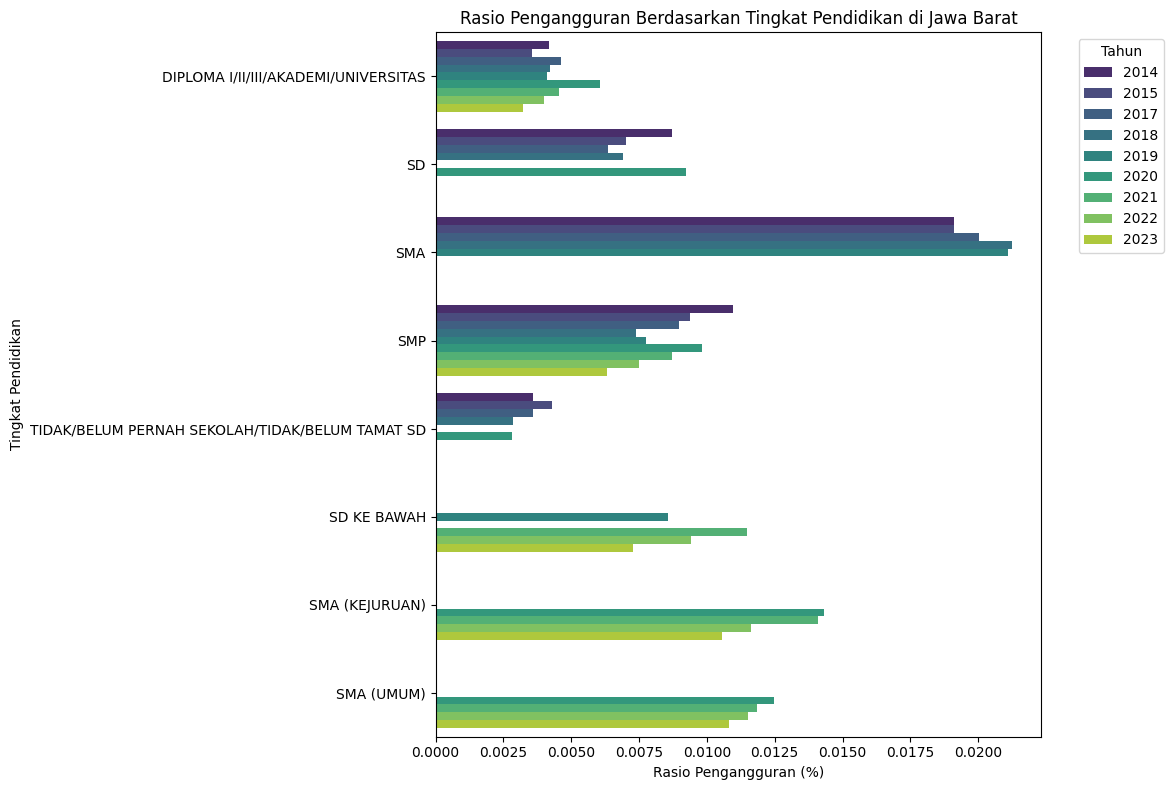

In [247]:
# Mengambil dataset yang relevan
jptp = datasets['JPTP']  # Jumlah pengangguran berdasarkan pendidikan
jpjk = datasets['JPJK']  # Jumlah penduduk berdasarkan jenis kelamin


# Hitung total jumlah penduduk (laki-laki dan perempuan) di setiap kabupaten/kota berdasarkan tahun
# Menggabungkan data laki-laki dan perempuan untuk mendapatkan total penduduk
total_penduduk_per_tahun = jpjk.groupby(['tahun'])['jumlah_penduduk'].sum().reset_index()
total_penduduk_per_tahun = total_penduduk_per_tahun.rename(columns={'jumlah_penduduk': 'total_penduduk'})

# menggabungkan total pengagguran untuk setiap jenis pekerjaan
total_pengangguran = jptp.groupby(['tahun', 'pendidikan'])['jumlah_pengangguran'].sum().reset_index()

# Gabungkan dataset JPTP dengan total jumlah penduduk untuk menghitung rasio pengangguran
merged_data = pd.merge(total_pengangguran, total_penduduk_per_tahun, on=['tahun'])

# Hitung rasio pengangguran untuk setiap tingkat pendidikan
merged_data['rasio_pengangguran'] = merged_data['jumlah_pengangguran'] / merged_data['total_penduduk']

# Plotting menggunakan barplot horizontal
plt.figure(figsize=(12, 8))
sb.barplot(x='rasio_pengangguran', y='pendidikan', hue='tahun', data=merged_data, palette='viridis', orient='h')
plt.title('Rasio Pengangguran Berdasarkan Tingkat Pendidikan di Jawa Barat')
plt.xlabel('Rasio Pengangguran (%)')
plt.ylabel('Tingkat Pendidikan')
plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### **Penjelasan Grafik diatas:**

*   Tingkat pengangguran tertinggi di Jawa Barat pada periode ini berada di kalangan lulusan SMA, baik umum maupun kejuruan, menunjukkan perlunya peningkatan keterampilan atau pendidikan lanjut bagi lulusan SMA agar dapat lebih siap bersaing di pasar kerja.
*   Lulusan perguruan tinggi dan diploma memiliki tingkat pengangguran yang lebih rendah, mengindikasikan bahwa pendidikan yang lebih tinggi masih menjadi salah satu faktor penting dalam mengurangi risiko pengangguran.
* Dampak pandemi COVID-19 terhadap pengangguran tampak nyata pada tahun 2020 dan 2021, tetapi ada indikasi pemulihan di beberapa sektor pendidikan pada tahun 2023.


## Tren Pengangguran Berdasarkan Daerah di Jawa Barat

In [248]:
print(datasets['TPT'])

      id  kode_kabupaten_kota nama_kabupaten_kota  \
155  156                 3201     KABUPATEN BOGOR   
156  157                 3202  KABUPATEN SUKABUMI   
157  158                 3203   KABUPATEN CIANJUR   
158  159                 3204   KABUPATEN BANDUNG   
159  160                 3205     KABUPATEN GARUT   
..   ...                  ...                 ...   
392  393                 3275         KOTA BEKASI   
393  394                 3276          KOTA DEPOK   
394  395                 3277         KOTA CIMAHI   
395  396                 3278    KOTA TASIKMALAYA   
396  397                 3279         KOTA BANJAR   

     persentase_penganggur_terbuka tahun  
155                           7.65  2014  
156                           8.09  2014  
157                          14.87  2014  
158                           8.48  2014  
159                           7.71  2014  
..                             ...   ...  
392                           7.90  2023  
393                

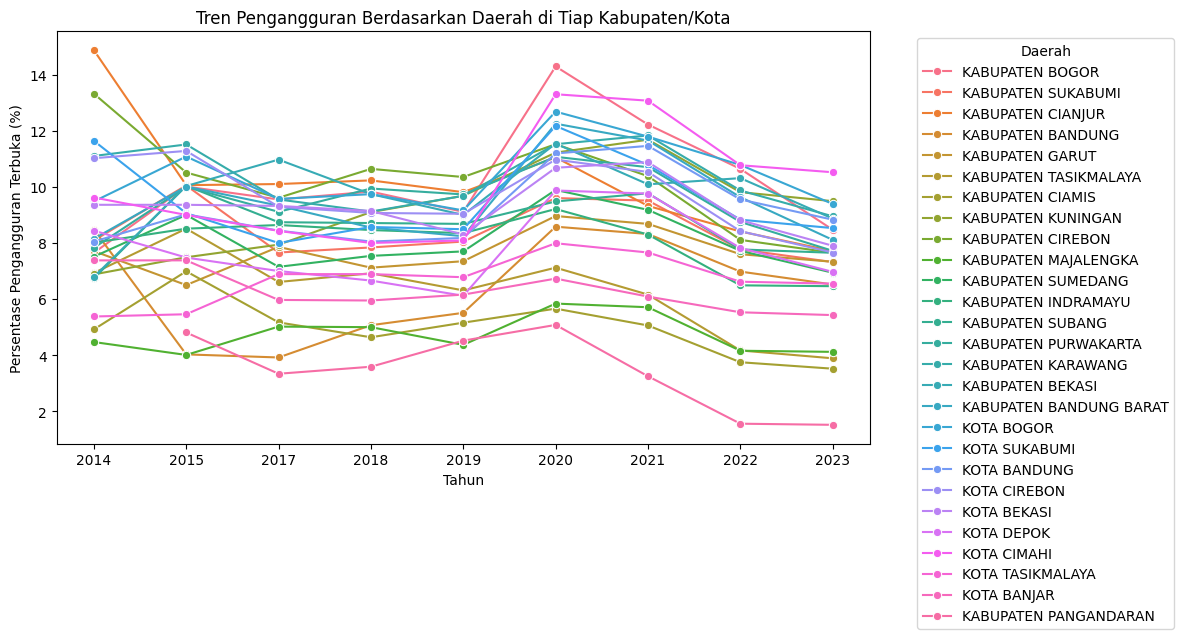

In [249]:
tpt = datasets['TPT']

# Plotting tren pengangguran
plt.figure(figsize=(12, 6))
sb.lineplot(data=tpt, x='tahun', y='persentase_penganggur_terbuka', hue='nama_kabupaten_kota', marker='o')
plt.title('Tren Pengangguran Berdasarkan Daerah di Tiap Kabupaten/Kota')
plt.xlabel('Tahun')
plt.ylabel('Persentase Pengangguran Terbuka (%)')
plt.legend(title='Daerah', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan tren pengangguran terbuka berdasarkan daerah di tiap kabupaten/kota di Jawa Barat dari tahun 2014 hingga 2023.

### **Kesimpulan**


*   Sebagian besar daerah mengalami tren yang relatif stabil dari tahun 2014 hingga 2019, meskipun ada fluktuasi kecil di beberapa daerah.
*   Pada tahun 2020, terdapat lonjakan tajam pada tingkat pengangguran di hampir seluruh kabupaten/kota, yang kemungkinan besar dipicu oleh pandemi COVID-19.
*   Setelah lonjakan tersebut, mulai terjadi penurunan bertahap di hampir semua daerah, terutama pada tahun 2022 hingga 2023.
*   Kabupaten Pangandaran menjadi daerah dengan Tingkat Pengangguran Terendah pada tahun 2023, dengan menunjukkan penurunan paling signifikan.











## **Tren Pengangguran Berdasarkan Jenis Kelamin**

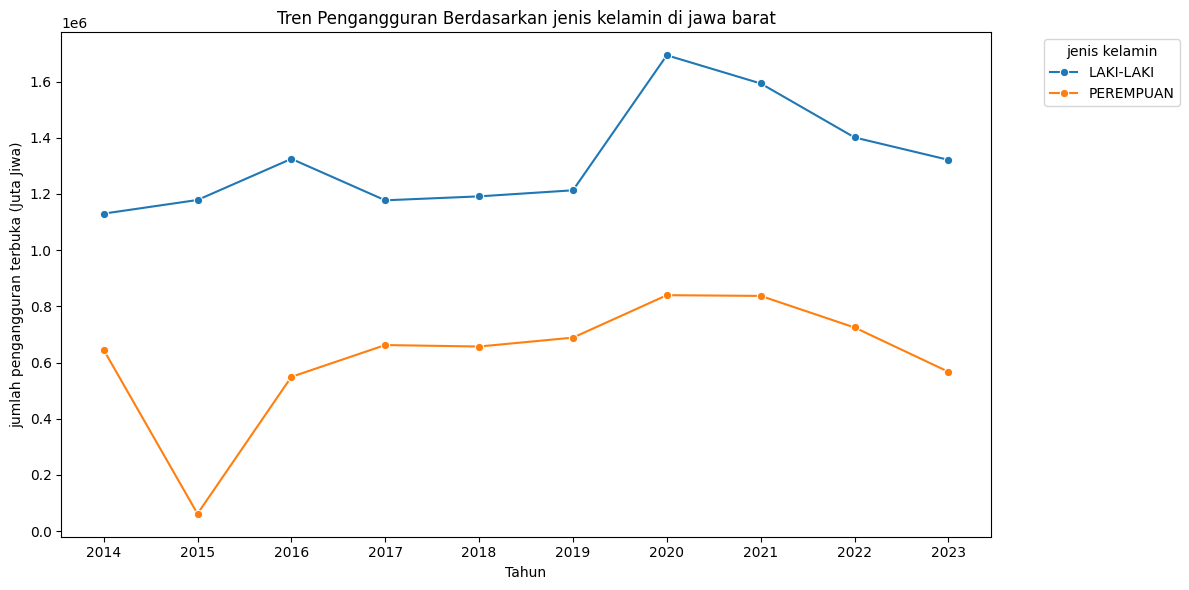

In [250]:
tpt = datasets['JPT']

# Plotting tren pengawngguran
plt.figure(figsize=(12, 6))
sb.lineplot(data=tpt, x='tahun', y='jumlah_pengangguran_terbuka', hue='jenis_kelamin', marker='o')
plt.title('Tren Pengangguran Berdasarkan jenis kelamin di jawa barat')
plt.xlabel('Tahun')
plt.ylabel('jumlah pengangguran terbuka (Juta Jiwa)')
plt.legend(title='jenis kelamin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Penjelasan Grafik diatas:**
* Perbedaan Gender dalam Pengangguran: Pengangguran di kalangan laki-laki secara konsisten lebih tinggi daripada perempuan selama periode 2014-2023. Hal ini bisa jadi karena sektor-sektor pekerjaan yang lebih rentan terhadap pengangguran mungkin lebih banyak diisi oleh laki-laki, seperti sektor informal atau manufaktur.
* Dampak Pandemi, Baik laki-laki maupun perempuan mengalami peningkatan tajam dalam jumlah pengangguran pada tahun 2020, menunjukkan dampak langsung dari pandemi COVID-19 terhadap kesempatan kerja. Namun, jumlah pengangguran laki-laki lebih drastis dibandingkan perempuan, menunjukkan bahwa pandemi mungkin lebih mempengaruhi sektor-sektor yang didominasi oleh laki-laki.
* Pemulihan Pasca-pandemi, Setelah 2020, terlihat ada tren penurunan dalam pengangguran baik untuk laki-laki maupun perempuan, tetapi angka pengangguran perempuan cenderung menurun lebih cepat. Ini menunjukkan pemulihan yang lebih merata di kalangan perempuan pasca-pandemi.


## **Distribusi pengangguran berdasarkan golongan umur**

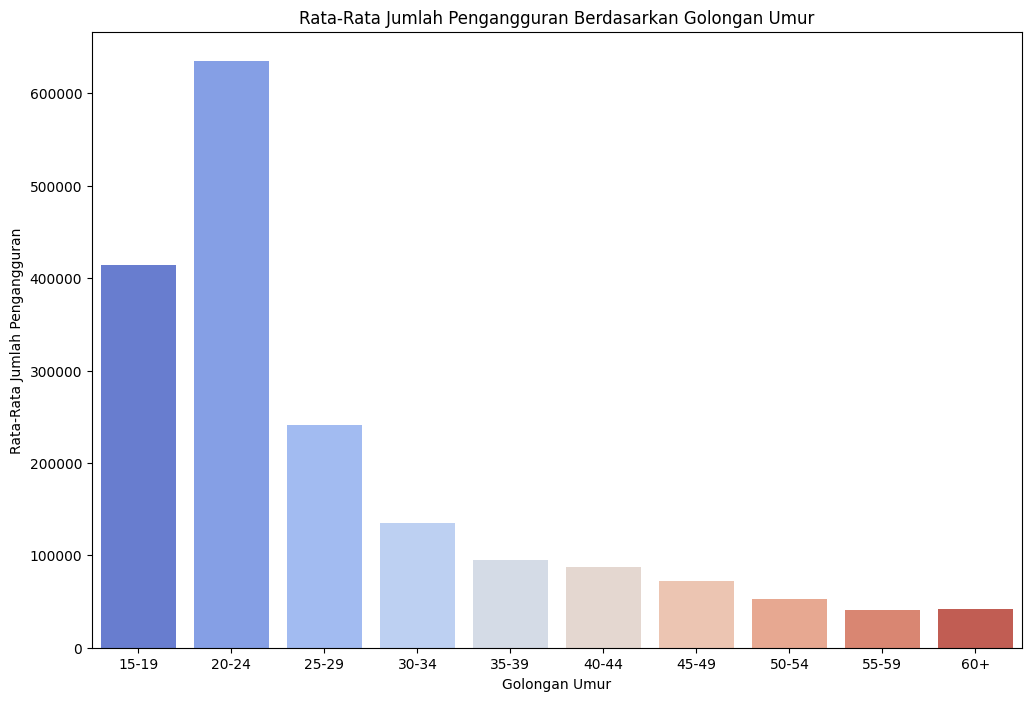

In [251]:
# Ambil data pengangguran berdasarkan golongan umur
umur_pengangguran = datasets['JPTU'][['golongan_umur', 'jumlah_pengangguran_terbuka']]

# Hitung rata-rata jumlah pengangguran untuk setiap golongan umur
rata_rata_pengangguran = umur_pengangguran.groupby('golongan_umur')['jumlah_pengangguran_terbuka'].mean().reset_index()

# Plot distribusi rata-rata pengangguran berdasarkan golongan umur
plt.figure(figsize=(12, 8))
sb.barplot(x='golongan_umur', y='jumlah_pengangguran_terbuka', data=rata_rata_pengangguran, palette='coolwarm')
plt.title('Rata-Rata Jumlah Pengangguran Berdasarkan Golongan Umur')
plt.xlabel('Golongan Umur')
plt.ylabel('Rata-Rata Jumlah Pengangguran')
plt.show()

Grafik ini menunjukkan rata-rata jumlah pengangguran berdasarkan golongan umur. Setiap bar di grafik menggambarkan rata-rata jumlah pengangguran dalam satuan ribuan di berbagai kelompok umur, dari usia 15-19 tahun hingga 60+ tahun.


### **Kesimpulan**
*   Kelompok usia muda (terutama usia 15-24 tahun) menghadapi tingkat pengangguran yang paling tinggi. Ini mungkin karena mereka adalah angkatan kerja baru yang sedang mencari pekerjaan pertama atau masih dalam tahap transisi dari pendidikan ke dunia kerja.
*   Kelompok usia lebih tua (di atas 40 tahun) menunjukkan penurunan jumlah pengangguran yang signifikan, yang mungkin menunjukkan bahwa mereka lebih stabil dalam pekerjaan atau mendekati usia pensiun.



## **Tren Jumlah Pengangguran berdasarkan Daerah di Jawa Barat pada tahun 2014 - 2023**

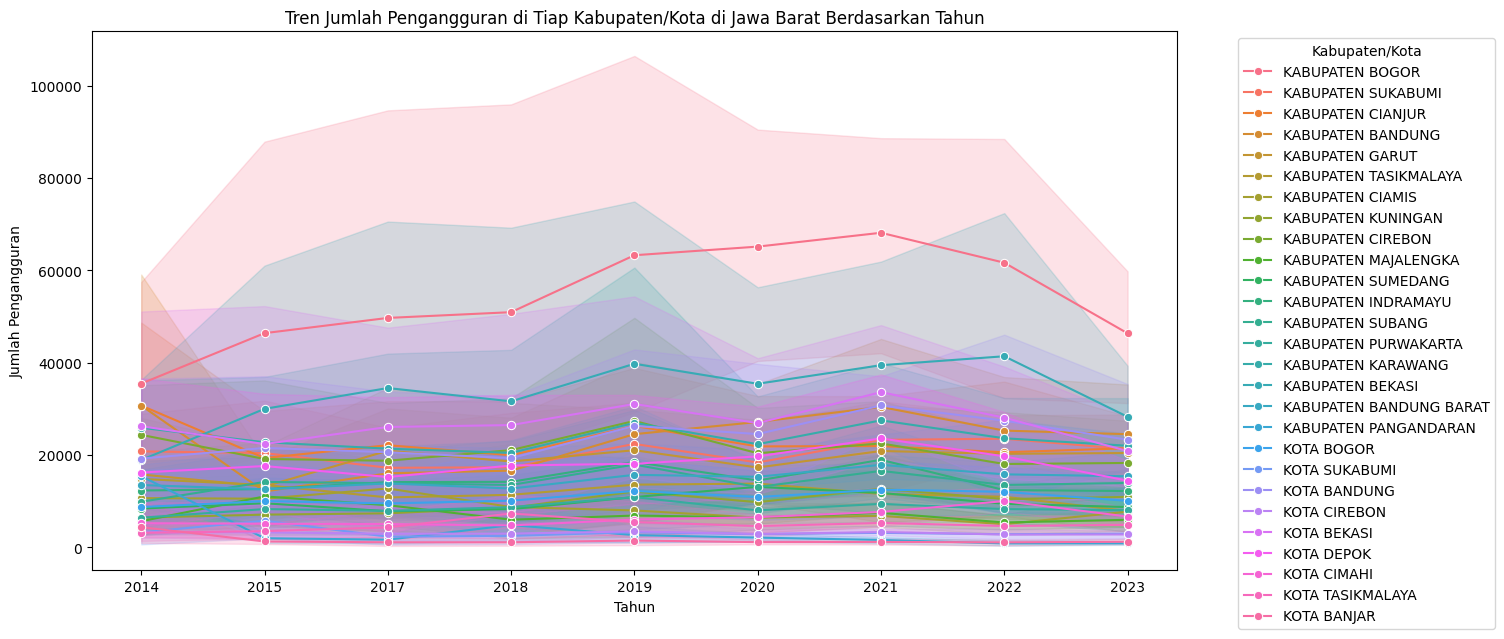

In [252]:
plt.figure(figsize=(14, 7))  # Mengatur ukuran plot
sb.lineplot(x='tahun', y='jumlah_pengangguran', hue='nama_kabupaten_kota', data=datasets['JPTP'], marker='o')
plt.title('Tren Jumlah Pengangguran di Tiap Kabupaten/Kota di Jawa Barat Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pengangguran')
plt.legend(title='Kabupaten/Kota', bbox_to_anchor=(1.05, 1), loc='upper left')  # Letakkan legend di luar plot
plt.show()

### **Penjelasan Grafik diatas:**
* Kabupaten Bogor menunjukkan dominasi jumlah pengangguran tertinggi sepanjang periode ini, sementara wilayah industri seperti Karawang dan Bekasi mengalami fluktuasi yang lebih signifikan, terutama pada masa pandemi.
* Tahun 2020 jelas merupakan tahun krisis, dengan hampir semua wilayah mengalami lonjakan pengangguran, yang kemudian diikuti oleh penurunan bertahap setelahnya.
* Beberapa kabupaten/kota, terutama yang lebih kecil atau kurang padat, menunjukkan tingkat pengangguran yang lebih stabil dan rendah, mungkin karena struktur ekonomi yang lebih tahan terhadap fluktuasi.

## **Rata-Rata Jumlah Pengangguran di Tiap Kabupaten/Kota di Jawa Barat**

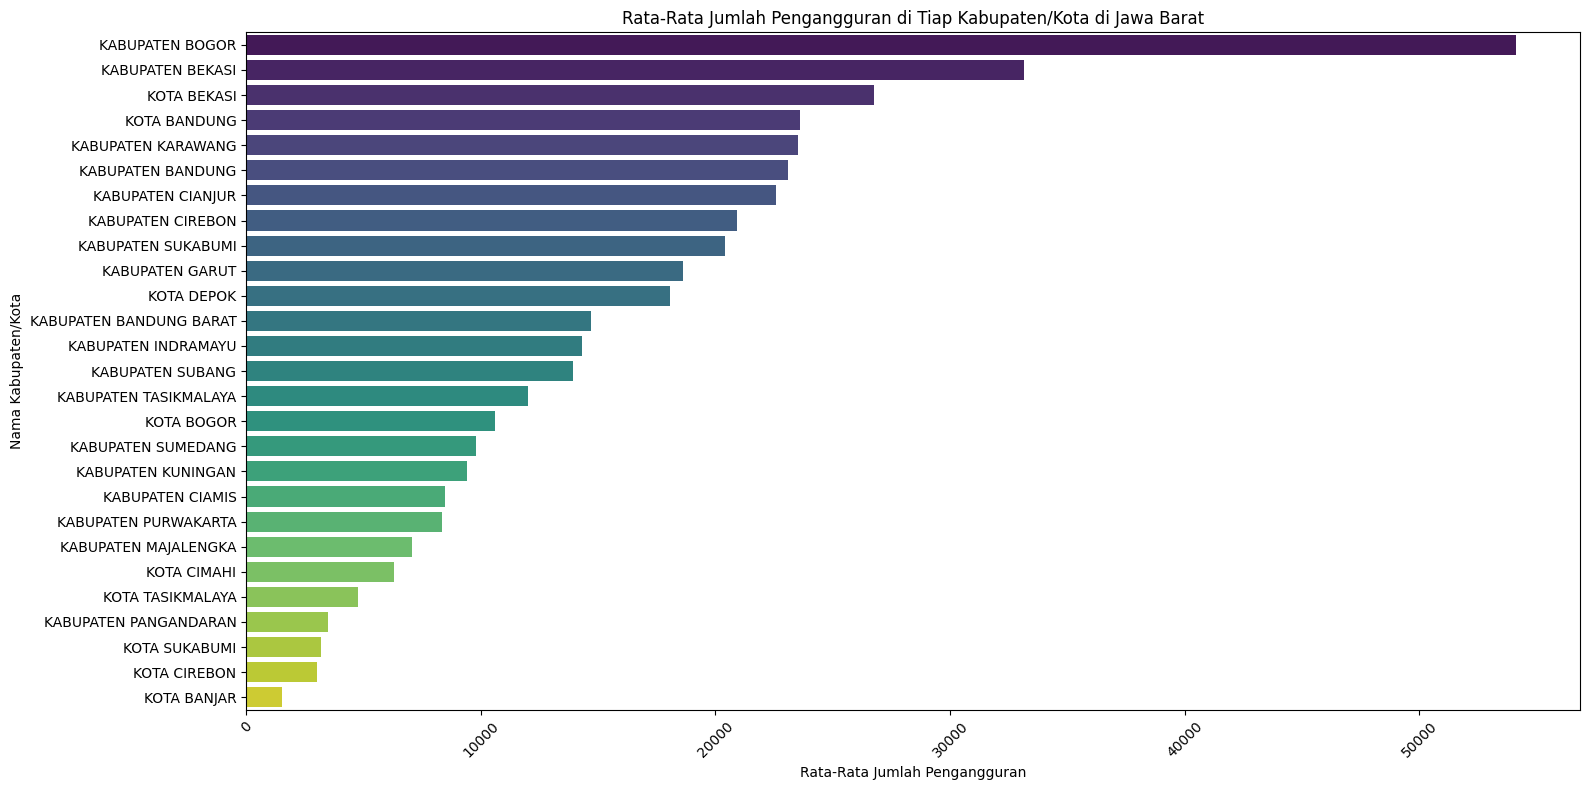

In [253]:
jptp = datasets['JPTP']

# Hitung rata-rata jumlah pengangguran untuk setiap kabupaten/kota di seluruh tahun
rata_rata_pengangguran = jptp.groupby('nama_kabupaten_kota')['jumlah_pengangguran'].mean().reset_index()

# Mengurutkan data berdasarkan jumlah pengangguran dari yang tertinggi ke terendah
rata_rata_pengangguran = rata_rata_pengangguran.sort_values(by='jumlah_pengangguran', ascending=False)

# Buat plot bar horizontal untuk menampilkan rata-rata jumlah pengangguran yang sudah diurutkan
plt.figure(figsize=(16, 8))  # Mengatur ukuran plot
sb.barplot(
    x='jumlah_pengangguran',           # Sumbu x: Rata-rata jumlah pengangguran
    y='nama_kabupaten_kota',           # Sumbu y: Nama Kabupaten/Kota
    data=rata_rata_pengangguran,       # Data yang digunakan
    palette='viridis'                  # Skema warna untuk visualisasi
)

# Mengatur tampilan plot
plt.title('Rata-Rata Jumlah Pengangguran di Tiap Kabupaten/Kota di Jawa Barat')                             # Judul plot
plt.xlabel('Rata-Rata Jumlah Pengangguran')                                                                 # Label sumbu x
plt.ylabel('Nama Kabupaten/Kota')                                                                           # Label sumbu y
plt.xticks(rotation=45)  # Rotasi label pada sumbu x agar lebih mudah dibaca

# Menampilkan plot
plt.tight_layout()  # Memperbaiki layout agar tidak terpotong
plt.show()

### **Penjelasan Grafik diatas:**
* Kabupaten Bogor, Bekasi, dan Bandung mendominasi dalam hal jumlah pengangguran yang tinggi, terutama karena populasi besar dan tingkat urbanisasi yang tinggi. Sementara itu, kabupaten/kota dengan basis ekonomi yang lebih kecil atau agraris, seperti Kabupaten Pangandaran dan Kota Banjar, cenderung memiliki tingkat pengangguran yang jauh lebih rendah.
* Wilayah-wilayah industri besar seperti Kabupaten Karawang dan Bekasi juga menunjukkan jumlah pengangguran yang signifikan, mungkin karena ketidakcocokan antara keterampilan pekerja dengan kebutuhan industri.


## **Tren Pengangguran dan Kemiskinan di Jawa Barat periode 2014 - 2023**

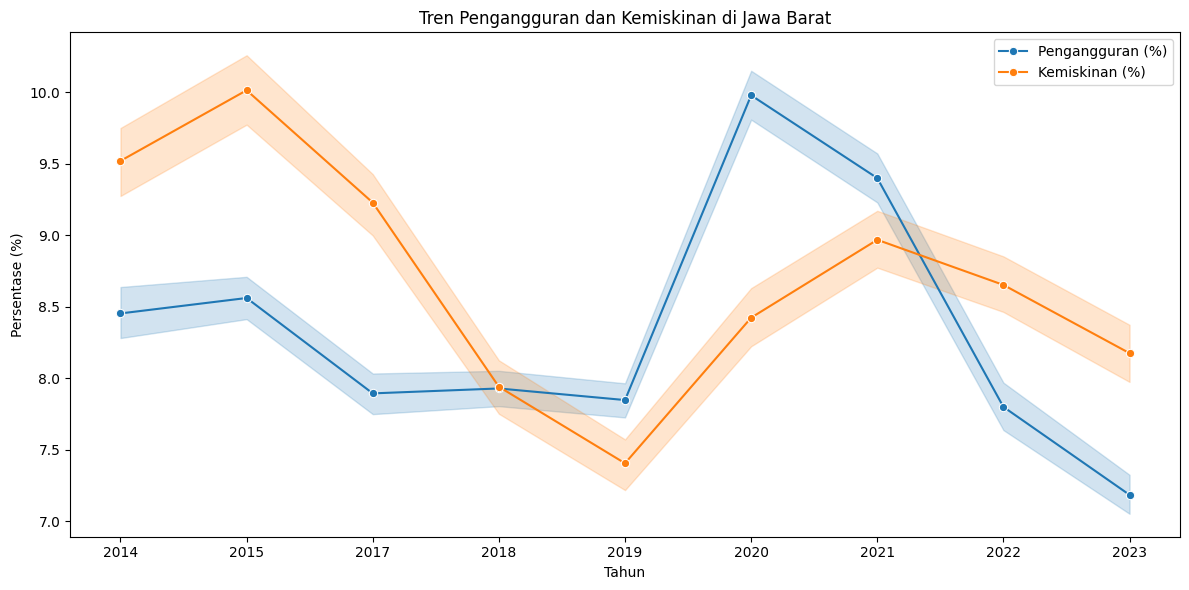

In [254]:

ppm = datasets['PPM']
tpt = datasets['TPT']

# Menggabungkan dataset PPM dengan TPT
merged_data = pd.merge(tpt[['nama_kabupaten_kota', 'tahun', 'persentase_penganggur_terbuka']],
                            ppm[['nama_kabupaten_kota', 'persentase_penduduk_miskin', 'tahun']],
                            left_on=['tahun'], right_on=['tahun'])

# Plotting
plt.figure(figsize=(12, 6))
sb.lineplot(data=merged_data, x='tahun', y='persentase_penganggur_terbuka', label='Pengangguran (%)', marker='o')
sb.lineplot(data=merged_data, x='tahun', y='persentase_penduduk_miskin', label='Kemiskinan (%)', marker='o')
plt.title('Tren Pengangguran dan Kemiskinan di Jawa Barat')
plt.xlabel('Tahun')
plt.ylabel('Persentase (%)')
plt.legend()
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan tren pengangguran dan kemiskinan di Provinsi Jawa Barat dari tahun 2014 hingga 2023.

### **Kesimpulan**


*   Terjadi dua kali peningkatan dan penurunan signifikan pada tahun 2015 dan 2020.
*   Peningkatan tajam pada tahun 2020 kemungkinan disebabkan oleh pandemi COVID-19, yang memicu lonjakan pengangguran dan kemiskinan.
*   Tingkat kemiskinan menurun lebih lambat dibandingkan tingkat pengangguran, yang mungkin menunjukkan:
    - Banyak orang telah kembali bekerja, namun pekerjaan tersebut mungkin berupah rendah atau berada di sektor informal.
    - Pendapatan dari pekerjaan yang diperoleh belum cukup untuk sepenuhnya mengurangi tingkat kemiskinan.





In [255]:
jpp = datasets['JPP']  # Jumlah Penduduk Berdasarkan Pekerjaan

# 1. Hitung rata-rata jumlah penduduk yang bekerja berdasarkan jenis pekerjaan
rata_rata_bekerja = jpp.groupby('jenis_pekerjaan')['jumlah_penduduk_bekerja'].mean().reset_index()

print(rata_rata_bekerja)

           jenis_pekerjaan  jumlah_penduduk_bekerja
0    AGAMA DAN KEPERCAYAAN                 7767.000
1                  AKUNTAN                  208.375
2              ANGGOTA BPK                   27.750
3              ANGGOTA DPD                   15.250
4           ANGGOTA DPR RI                   60.500
..                     ...                      ...
98          WAKIL PRESIDEN                    0.500
99          WAKIL WALIKOTA                    5.250
100               WALIKOTA                    6.375
101               WARTAWAN                 2657.125
102             WIRASWASTA              2906893.000

[103 rows x 2 columns]


## **Distribusi Jumlah Penduduk berdasarkan Jenis Pekerjaan di Jawa Barat**

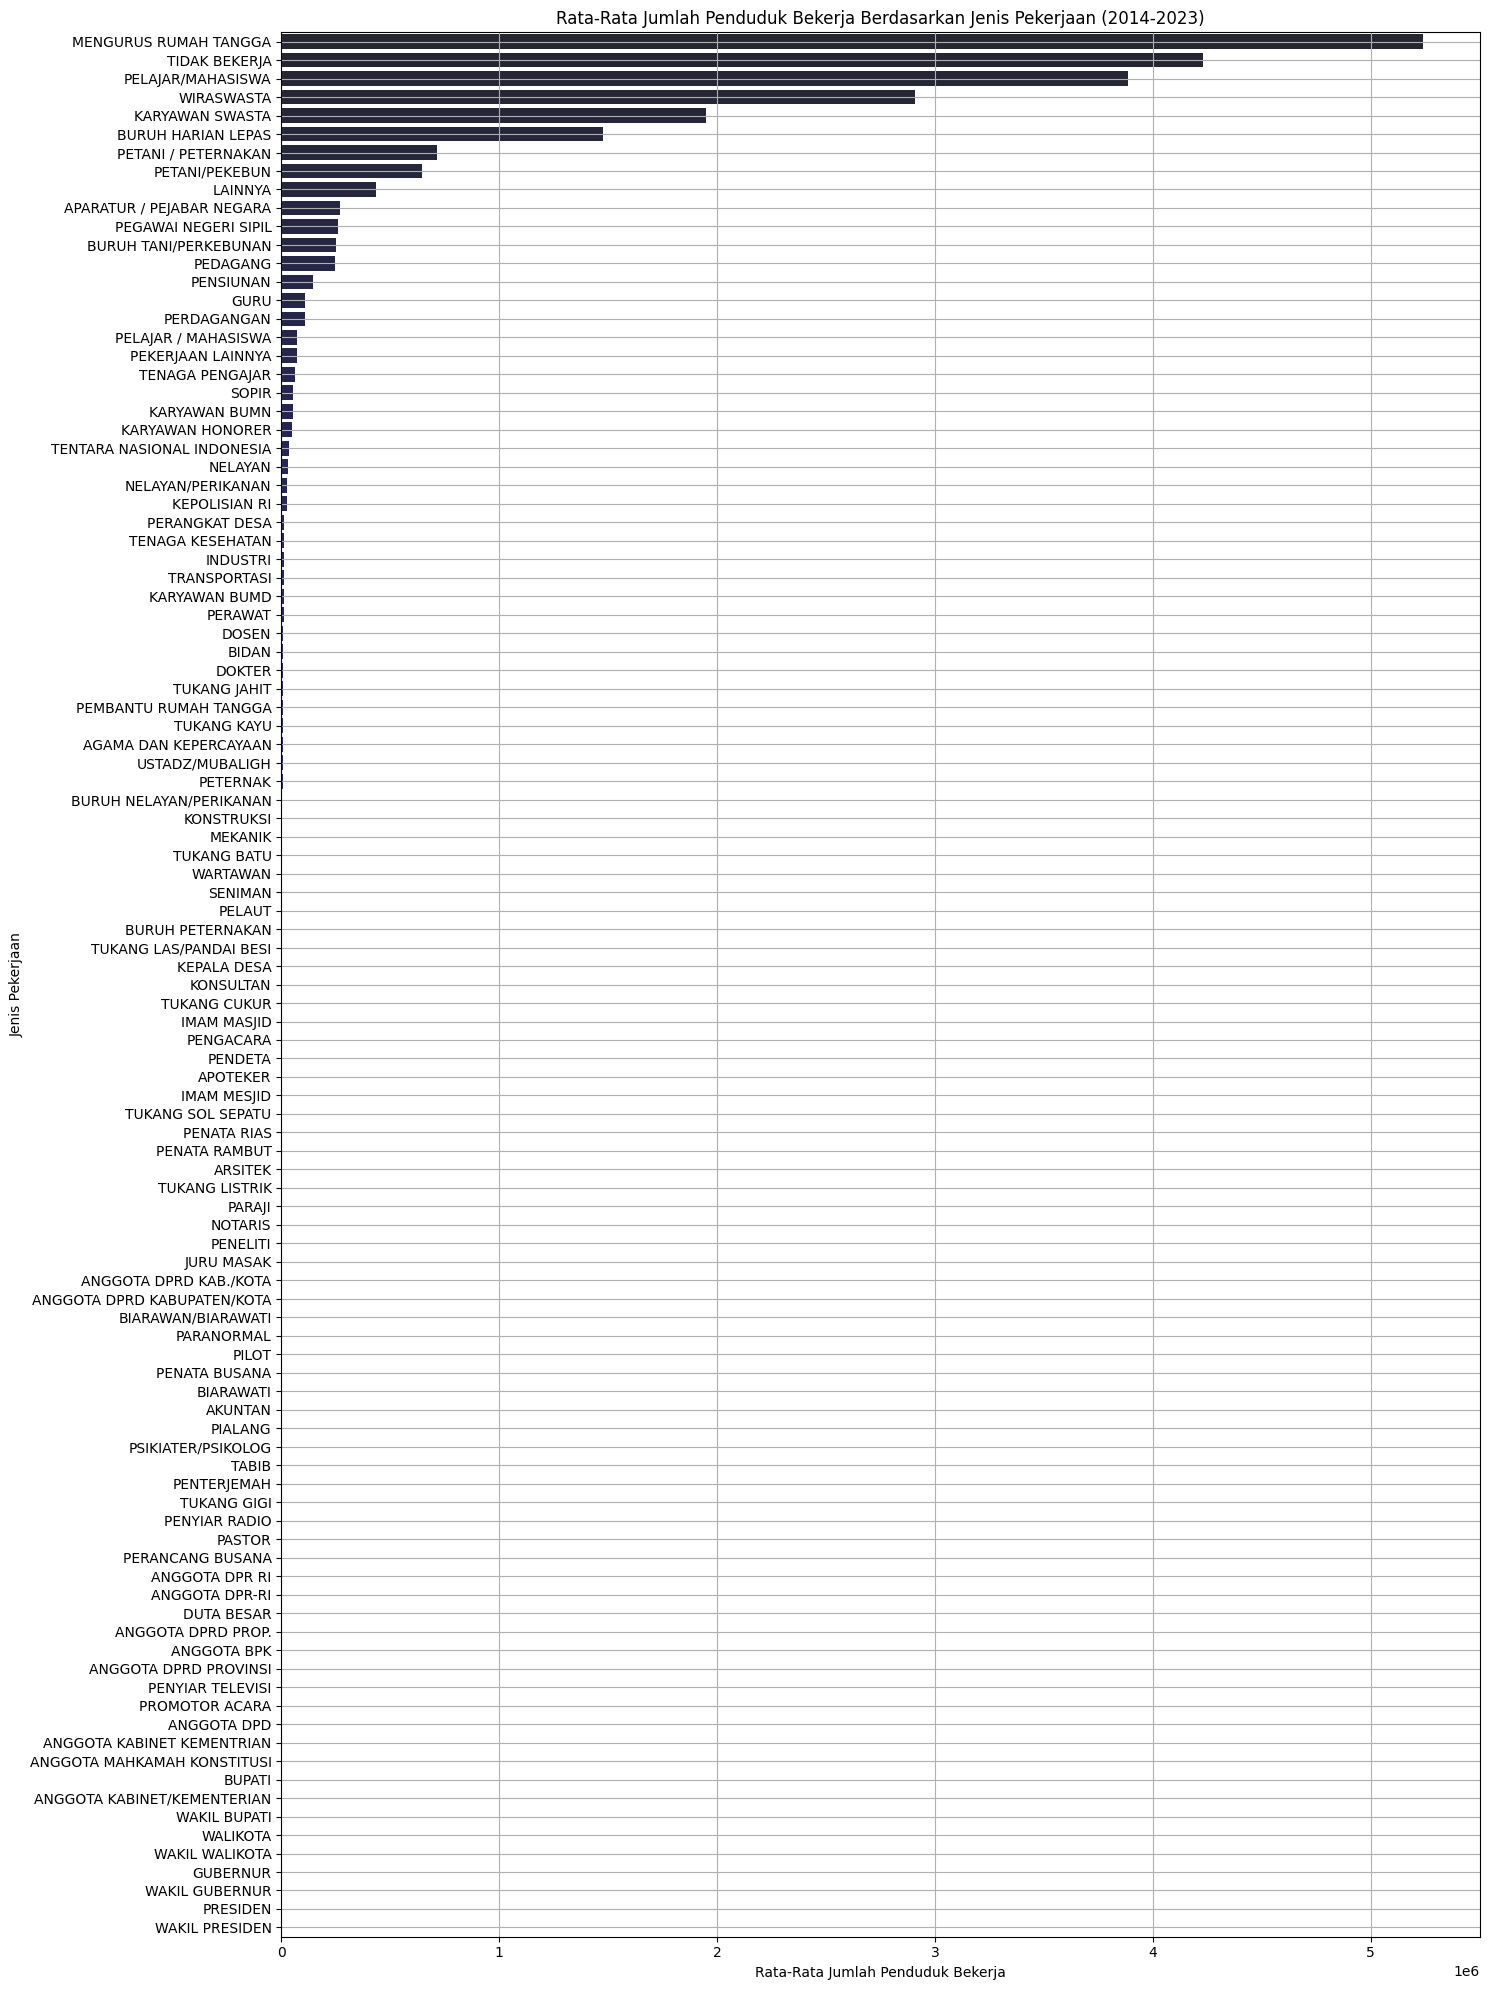

In [256]:
# Load dataset
jpp = datasets['JPP']  # Jumlah Penduduk Berdasarkan Pekerjaan

# 1. Hitung rata-rata jumlah penduduk yang bekerja berdasarkan jenis pekerjaan
rata_rata_bekerja = jpp.groupby('jenis_pekerjaan')['jumlah_penduduk_bekerja'].mean().reset_index()

# 2. Sorting data berdasarkan rata-rata jumlah penduduk yang bekerja dari yang paling banyak
rata_rata_bekerja = rata_rata_bekerja.sort_values(by='jumlah_penduduk_bekerja', ascending=False)

# 3. Normalisasi untuk membuat warna yang lebih gelap
normed_values = rata_rata_bekerja['jumlah_penduduk_bekerja'] / rata_rata_bekerja['jumlah_penduduk_bekerja'].max()

# 4. Konversi array warna menjadi daftar warna
colors = sb.dark_palette("blue", as_cmap=False, n_colors=len(rata_rata_bekerja))

# 5. Plot rata-rata jumlah penduduk yang bekerja berdasarkan jenis pekerjaan
plt.figure(figsize=(15, 20))  # Mengatur ukuran plot yang lebih panjang
sb.barplot(data=rata_rata_bekerja, y='jenis_pekerjaan', x='jumlah_penduduk_bekerja', palette=colors)
plt.title('Rata-Rata Jumlah Penduduk Bekerja Berdasarkan Jenis Pekerjaan (2014-2023)')
plt.xlabel('Rata-Rata Jumlah Penduduk Bekerja')
plt.ylabel('Jenis Pekerjaan')
plt.grid(True)
plt.tight_layout()  # Memperbaiki layout agar tidak terpotong
plt.show()

### **Penjelasan Grafik diatas:**
* Mayoritas penduduk terlibat dalam aktivitas non-formal seperti mengurus rumah tangga, tidak bekerja, dan bersekolah, dengan jumlah signifikan dibandingkan dengan pekerjaan formal lainnya.
* Sektor swasta dan informal mendominasi pekerjaan formal, terutama dalam kategori seperti karyawan swasta, buruh harian, dan petani, yang menunjukkan ketergantungan besar pada sektor-sektor ini.
* Profesi dengan kualifikasi tinggi atau jabatan pemerintahan memiliki jumlah yang sangat kecil dibandingkan pekerjaan umum, yang menunjukkan bahwa hanya sebagian kecil populasi yang bekerja di posisi-posisi tersebut.
* Pendidikan merupakan fokus besar dengan banyak penduduk yang tercatat sebagai pelajar atau mahasiswa, mengindikasikan perhatian besar pada pengembangan sumber daya manusia di masa depan.
* Pegawai negeri dan aparatur negara hanya mencakup bagian kecil dari total pekerja, yang bisa mengindikasikan terbatasnya peluang atau kapasitas untuk menyerap tenaga kerja di sektor pemerintahan.

## **Perbandingan Jumlah Pengangguran dan Penduduk Usia Produktif berdasarkan Jenis Kelamin**

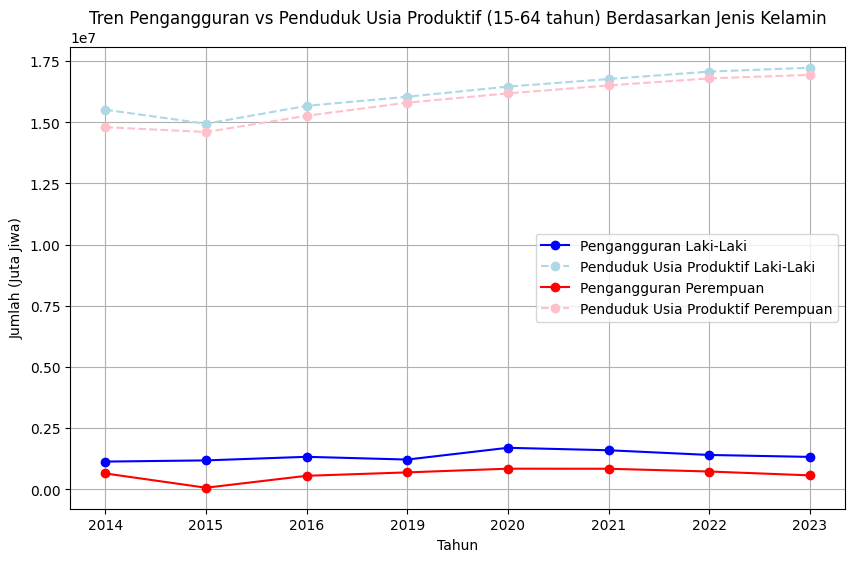

In [257]:
# Load dataset pengangguran dan penduduk usia produktif
jpup = datasets['JPUP']  # Data penduduk usia produktif
jpt = datasets['JPT']    # Data pengangguran


# 1. Hitung jumlah pengangguran per tahun berdasarkan jenis kelamin
pengangguran_laki = jpt[jpt['jenis_kelamin'] == 'LAKI-LAKI'].groupby('tahun')['jumlah_pengangguran_terbuka'].sum()
pengangguran_perempuan = jpt[jpt['jenis_kelamin'] == 'PEREMPUAN'].groupby('tahun')['jumlah_pengangguran_terbuka'].sum()

# 2. Hitung jumlah penduduk usia produktif per tahun berdasarkan jenis kelamin
# Pastikan untuk menggunakan nama kolom yang benar sesuai dengan output dari jpup.info()
penduduk_laki = jpup[jpup['jenis_kelamin'] == 'LAKI-LAKI'].groupby('tahun')['jumlah_penduduk_usia_produktif'].sum()  # Ganti nama kolom sesuai kebutuhan
penduduk_perempuan = jpup[jpup['jenis_kelamin'] == 'PEREMPUAN'].groupby('tahun')['jumlah_penduduk_usia_produktif'].sum()  # Ganti nama kolom sesuai kebutuhan

# 3. Gabungkan kedua dataset berdasarkan tahun untuk masing-masing jenis kelamin
unemployment_vs_population_laki = pd.DataFrame({
    'pengangguran_laki': pengangguran_laki,
    'penduduk_usia_produktif_laki': penduduk_laki
}).dropna()  # Menghapus data yang kosong

unemployment_vs_population_perempuan = pd.DataFrame({
    'pengangguran_perempuan': pengangguran_perempuan,
    'penduduk_usia_produktif_perempuan': penduduk_perempuan
}).dropna()  # Menghapus data yang kosong

# 4. Plot grafik garis tren pengangguran vs penduduk usia produktif untuk Laki-laki dan Perempuan
plt.figure(figsize=(10, 6))

# Plot untuk Laki-Laki
plt.plot(unemployment_vs_population_laki.index, unemployment_vs_population_laki['pengangguran_laki'], marker='o', label='Pengangguran Laki-Laki', color='blue')
plt.plot(unemployment_vs_population_laki.index, unemployment_vs_population_laki['penduduk_usia_produktif_laki'], marker='o', label='Penduduk Usia Produktif Laki-Laki', linestyle='--', color='lightblue')

# Plot untuk Perempuan
plt.plot(unemployment_vs_population_perempuan.index, unemployment_vs_population_perempuan['pengangguran_perempuan'], marker='o', label='Pengangguran Perempuan', color='red')
plt.plot(unemployment_vs_population_perempuan.index, unemployment_vs_population_perempuan['penduduk_usia_produktif_perempuan'], marker='o', label='Penduduk Usia Produktif Perempuan', linestyle='--', color='pink')

# Menambahkan judul, label, dan legenda
plt.title('Tren Pengangguran vs Penduduk Usia Produktif (15-64 tahun) Berdasarkan Jenis Kelamin')
plt.xlabel('Tahun')
plt.ylabel('Jumlah (Juta Jiwa)')
plt.legend()
plt.grid(True)
plt.show()

Grafik di atas menunjukkan tren pengangguran dibandingkan dengan jumlah penduduk usia produktif (15-64 tahun) di Indonesia berdasarkan jenis kelamin antara tahun 2014 hingga 2023.

### **Kesimpulan**
*   Jumlah pengangguran baik untuk laki-laki maupun perempuan relatif kecil dan stabil dibandingkan dengan jumlah total penduduk usia produktif.
*   Ada peningkatan jumlah penduduk usia produktif dari waktu ke waktu, tetapi pengangguran tidak menunjukkan tren peningkatan yang signifikan, kecuali lonjakan kecil yang kemungkinan terjadi pada tahun 2020 akibat COVID-19.
*   Tren ini menunjukkan bahwa meskipun populasi usia produktif meningkat, tingkat pengangguran tetap terkendali sepanjang periode yang ditunjukkan.





## **Heatmap korelasi antara penganggur terbuka, penduduk miskin, dan penduduk bekerja**

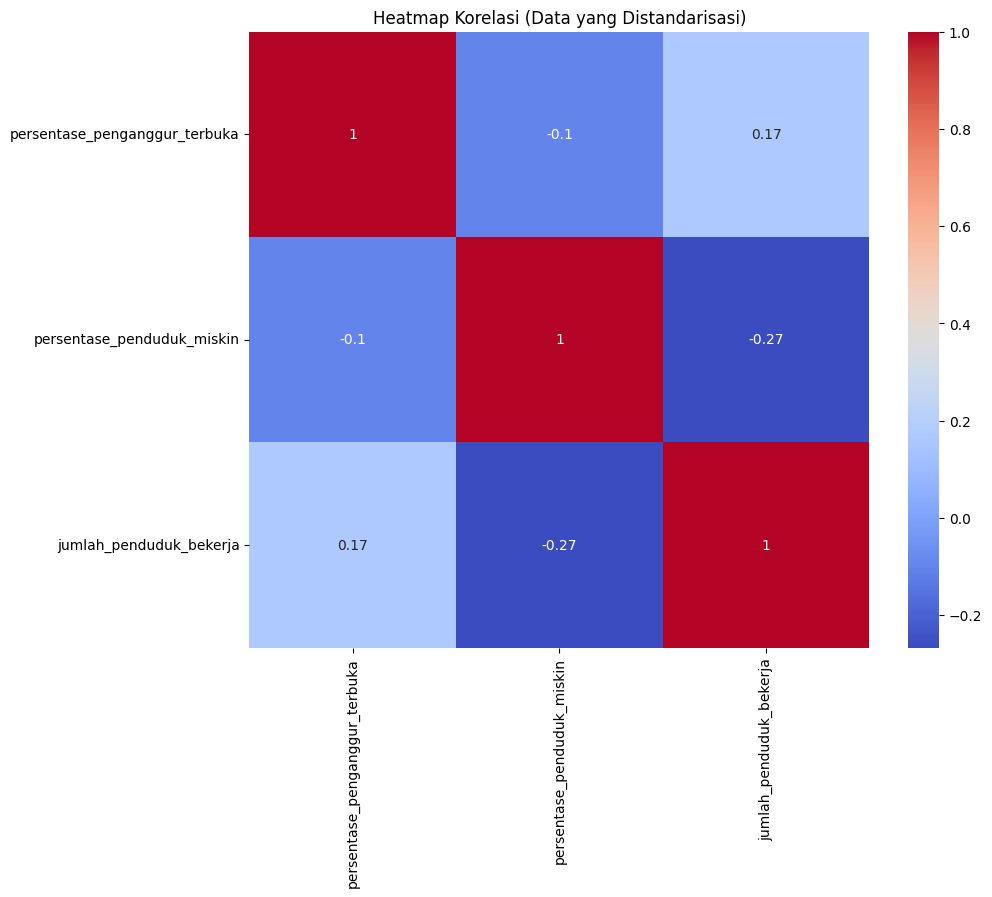

In [258]:
# Ambil dataset yang relevan
tpt = datasets['TPT'][['nama_kabupaten_kota', 'persentase_penganggur_terbuka', 'tahun']]
ppm = datasets['PPM'][['nama_kabupaten_kota', 'persentase_penduduk_miskin', 'tahun']]
jpbk = datasets['JPBK'][['nama_kabupaten_kota', 'jumlah_penduduk_bekerja', 'tahun']]

# 1. Gabungkan dataset berdasarkan 'nama_kabupaten_kota' dan 'tahun'
merged_data = pd.merge(tpt, ppm, on=['nama_kabupaten_kota', 'tahun'])
merged_data = pd.merge(merged_data, jpbk, on=['nama_kabupaten_kota', 'tahun'])

# 2. Ambil hanya kolom yang akan dianalisis
columns_to_analyze = ['persentase_penganggur_terbuka', 'persentase_penduduk_miskin', 'jumlah_penduduk_bekerja']

# 3. Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(merged_data[columns_to_analyze])

# 4. Konversi hasil standarisasi kembali menjadi DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=columns_to_analyze)

# 5. Hitung korelasi pada data yang sudah distandarisasi
correlation_matrix = standardized_df.corr()

# 6. Plot heatmap korelasi dari data yang sudah distandarisasi
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi (Data yang Distandarisasi)')
plt.show()

### **Penjelasan Heatmap diatas**
* Keterkaitan antara pengangguran dan kemiskinan tidak terlalu kuat, menunjukkan bahwa pengangguran saja bukanlah satu-satunya faktor yang menentukan tingkat kemiskinan. Faktor lain seperti kualitas pekerjaan, upah, dan akses terhadap pekerjaan formal kemungkinan lebih mempengaruhi tingkat kemiskinan.
* Jumlah penduduk bekerja memiliki hubungan negatif dengan kemiskinan, yang berarti semakin banyak orang yang bekerja, ada potensi penurunan kemiskinan, meski hubungan ini tidak sepenuhnya kuat. Ini menyoroti pentingnya pekerjaan yang berkualitas, bukan hanya jumlah pekerjaan.
* Pengangguran dan jumlah penduduk bekerja memiliki sedikit korelasi positif, yang bisa jadi menandakan adanya pergerakan tenaga kerja yang mungkin keluar dari pengangguran dan masuk ke pekerjaan informal.